<div align="center">

# **CS-E4650 Methods of Data Mining**

# **Final Project Report**

</div>

:<div align="center">
    
# **Nguyen Xuan Binh - 887799**

</div>

</br>
</br>
</br>
</br>
</br>
</br>

# **Table of Contents**

### 1. [Introduction](#1-introduction)
### 2. [Univariate Analysis](#2-univariate-analysis)
### 3. [Bivariate Analysis](#3-bivariate-analysis)
### 4. [Multivariate Analysis](#4-multivariate-analysis)
   #### 4.1 [Selection of Methods](#41-selection-of-methods)
   #### 4.2 [Technical Implementation](#42-technical-implementation)
   #### 4.3 [Result Presentation and Interpretation](#43-result-presentation-and-interpretation)
### 5. [Critical Evaluations](#5-critical-evaluations)
### 6. [Conclusion](#6-conclusion)
### 7. [Reference](#7-reference)


</br>
</br>
</br>
</br>
</br>
</br>

# 1. INTRODUCTION (0.5 point)

New material discoveries are a major driver of technological development. The discovery of steel and bronze in antiquity and the development of synthetic polymers in the 20th century were two examples of how new materials have drastically altered human society. These days, advances in materials science are also essential for addressing some of the most important social issues, like climate change and the future of our energy supply.

Nonetheless, there is still a lot of trial and error involved in materials discovery today. Finding a material that is appropriate for a technological use might take decades of study, and optimizing that material for commercialization can take much longer. 

In this report, I introduce the Materials Project (www.materialsproject.org) dataset [1], which is a component of the Materials Genome Initiative. One of the Materials Project’s key purpose is to compute the properties of compounds for which experimental data may be incomplete. This comprehensive dataset consists of 83989 atoms/molecules, which is the version on 2018. The dataset is available at this URL

https://figshare.com/articles/dataset/Materials_Project_Data/7227749



"Can clustering analysis on the Materials Project dataset identify distinct groups of materials based on their energy-related properties, and are these groups indicative of potential candidates for renewable energy applications?"

Rationale for the Question:
This research question is designed to explore the potential of materials for applications in renewable energy, a pressing global issue. The properties provided in the dataset offer a unique opportunity to assess materials from various perspectives:

# 2. Univariate analysis (1 point)

### 2.2 Dataset description

In this dataset, there are in total 7 columns, 6 of which are properties of the atoms or molecules. The first column contains the chemical formula for the corresponding atom or molecule based on IUPAC nomenclature. 

The six columns (properties) are:

- energy_above_hull: This represents the energy above the convex hull for a given material. If a material has an energy above hull of zero, it is on the convex hull and is considered thermodynamically stable. A positive value indicates how much energy would need to be removed from the material to make it as stable as the stable phases on the hull. This is crucial for understanding phase stability in materials science.

- band_gap: This is an energy range in a solid where no electronic states exist. Substances having large band gaps (also called "wide" band gaps) are generally insulators, those with small band gaps (also called "narrow" band gaps) are semiconductor, and conductors either have very small band gaps or none, because the valence and conduction bands overlap to form a continuous band.

- total_magnetization: This is the density of permanent or induced magnetic dipole moments within a magnetic material.

- total_energy: This includes both kinetic energy (associated with molecular motion) and potential energy (related to chemical bonds) for an atom or the whole molecule

- energy_per_atom: This is the total energy divided by the number of atoms in the unit cell. It provides a way to compare the energy contents of materials with different sizes and compositions.

- formation_energy_per_atom: This is the amount of energy evolved or absorbed when a substance is formed from its constituent elements in a certain condition of temperature and pressure

There are also other 3 columns, elastic_anisotropy, K_VRH (Voigt-Reuss-Hill average of the bulk modulus), G_VRH (Voigt-Reuss-Hill average of the shear modulus) that are not included for analysis in this report. The main reason is that they have too many empty values and imputing them is practically impossible. In reality, these three properties require huge computing powers to obtain, so naturally those three properties are still unknown for many molecules.  

### 2.2 Statistic summary and visualization

In [15]:
from IPython.core.display import HTML
HTML('<style>.input, .jp-InputArea {display: none !important}</style>')

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
mp_nostruct = pd.read_csv('mp_nostruct_clean.csv')

# The 7 columns 
# formula
# energy_above_hull
# band_gap
# total_magnetization
# total_energy
# energy_per_atom
# formation_energy_per_atom

mp_nostruct.head(10)

,formula,energy_above_hull,band_gap,total_magnetization,total_energy,energy_per_atom,formation_energy_per_atom
0,In,0.003319,0.0000,2.700000e-05,-2.721563,-2.721563,0.003319
1,Mg,0.039182,0.0000,-1.360000e-05,-1.565153,-1.565153,0.039182
2,Be,0.108143,0.0000,1.000000e-07,-14.537871,-3.634468,0.108143
3,Hf,0.071216,0.0000,-2.050000e-05,-9.883049,-9.883049,0.071216
4,P,3.509988,2.0113,3.000042e+00,-1.895193,-1.895193,3.509988
5,Xe,0.005612,6.1701,0.000000e+00,-0.030139,-0.030139,0.005612
6,Hg,0.020462,0.0000,-2.800000e-06,-0.283229,-0.283229,0.020462
7,Br,0.615956,0.0000,-1.807400e-03,-1.013059,-1.013059,0.615956
8,Sr,0.008637,0.0000,-1.827100e-03,-1.677328,-1.677328,0.008637
9,Xe,0.000000,6.1671,1.040000e-05,-0.035751,-0.035751,0.000000


In [11]:
# Create a dataframe that contains the 6 columns except formula
# and the indices are the rows for statistics value
# mean, std, skewness, kurtosis, 0% (min), 25%, 50% (median), 75%, 100% (max)

mp_nostruct_stats = mp_nostruct.drop('formula', axis=1)

# Get the statistics value for the 6 columns

# Calculate various statistics
stats_mean = mp_nostruct_stats.mean()
stats_std = mp_nostruct_stats.std()
stats_skew = mp_nostruct_stats.skew()
stats_kurtosis = mp_nostruct_stats.kurt()
stats_min = mp_nostruct_stats.min()
stats_25 = mp_nostruct_stats.quantile(0.25)
stats_50 = mp_nostruct_stats.median()  # or quantile(0.5)
stats_75 = mp_nostruct_stats.quantile(0.75)
stats_max = mp_nostruct_stats.max()

# Combine all stats into a new DataFrame
stats_df = pd.DataFrame({
    'mean': stats_mean,
    'std': stats_std,
    'skewness': stats_skew,
    'kurtosis': stats_kurtosis,
    '0%': stats_min,
    '25%': stats_25,
    '50%': stats_50,
    '75%': stats_75,
    '100%': stats_max
})

# Transpose the DataFrame to have statistics as indices
mp_nostruct_stats = stats_df.T

mp_nostruct_stats


,energy_above_hull,band_gap,total_magnetization,total_energy,energy_per_atom,formation_energy_per_atom
mean,0.142806,1.181326,5.315005,-171.822498,-5.815823,-1.475265
std,0.423493,1.564290,12.624827,185.554043,1.823426,1.247408
skewness,5.920774,1.346495,4.908275,-2.227180,0.318152,0.530711
kurtosis,40.817304,1.497373,40.911982,7.051213,0.226503,0.507995
0%,0.000000,0.000000,-84.003218,-1834.877179,-14.331771,-4.522664
25%,0.000000,0.000000,0.000000,-235.703841,-7.031504,-2.489777
50%,0.027675,0.272400,0.001509,-107.725258,-6.036196,-1.613350
75%,0.094054,2.113900,5.000003,-40.486961,-4.724733,-0.484626
100%,5.892481,17.891400,279.988888,-0.016100,-0.016100,4.828697


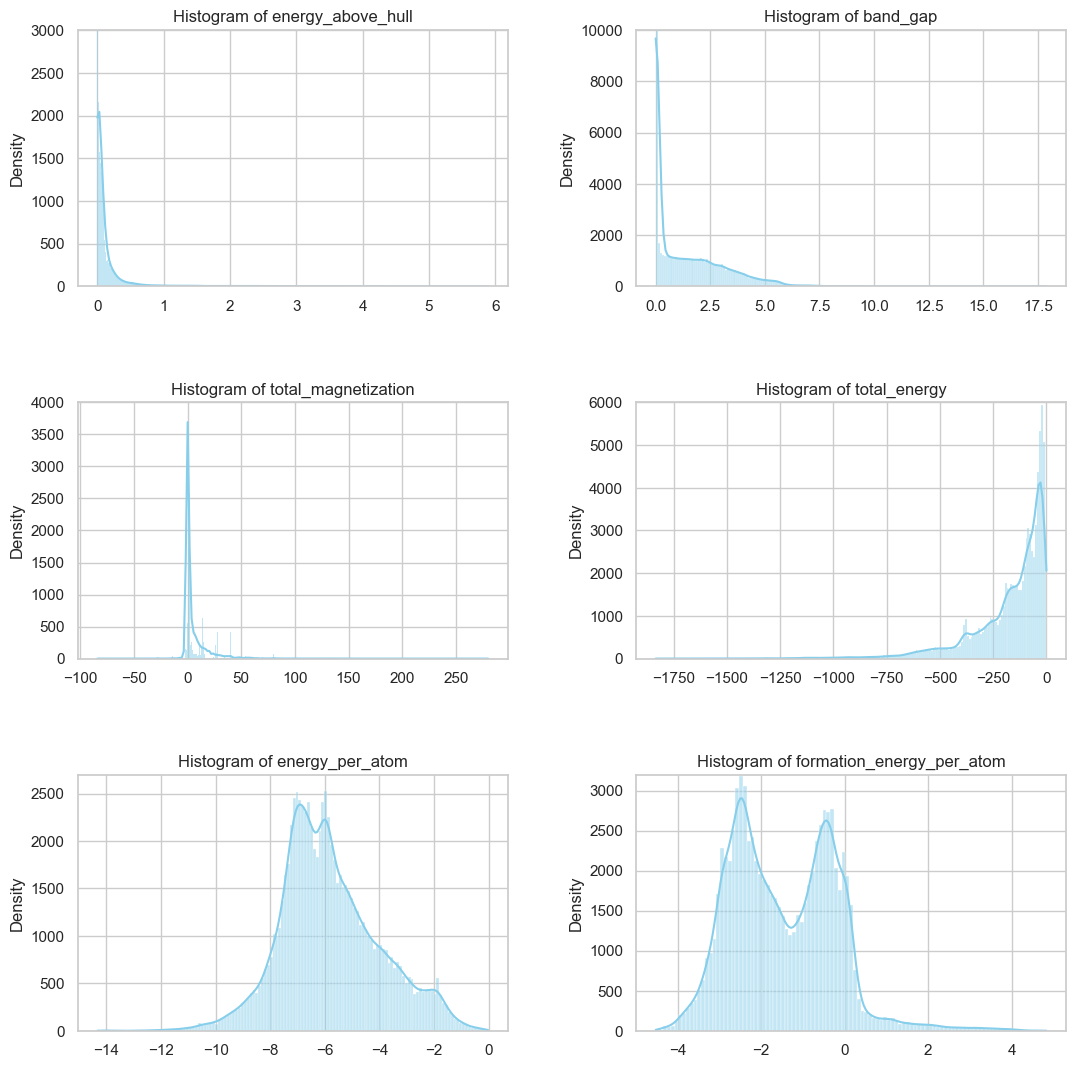

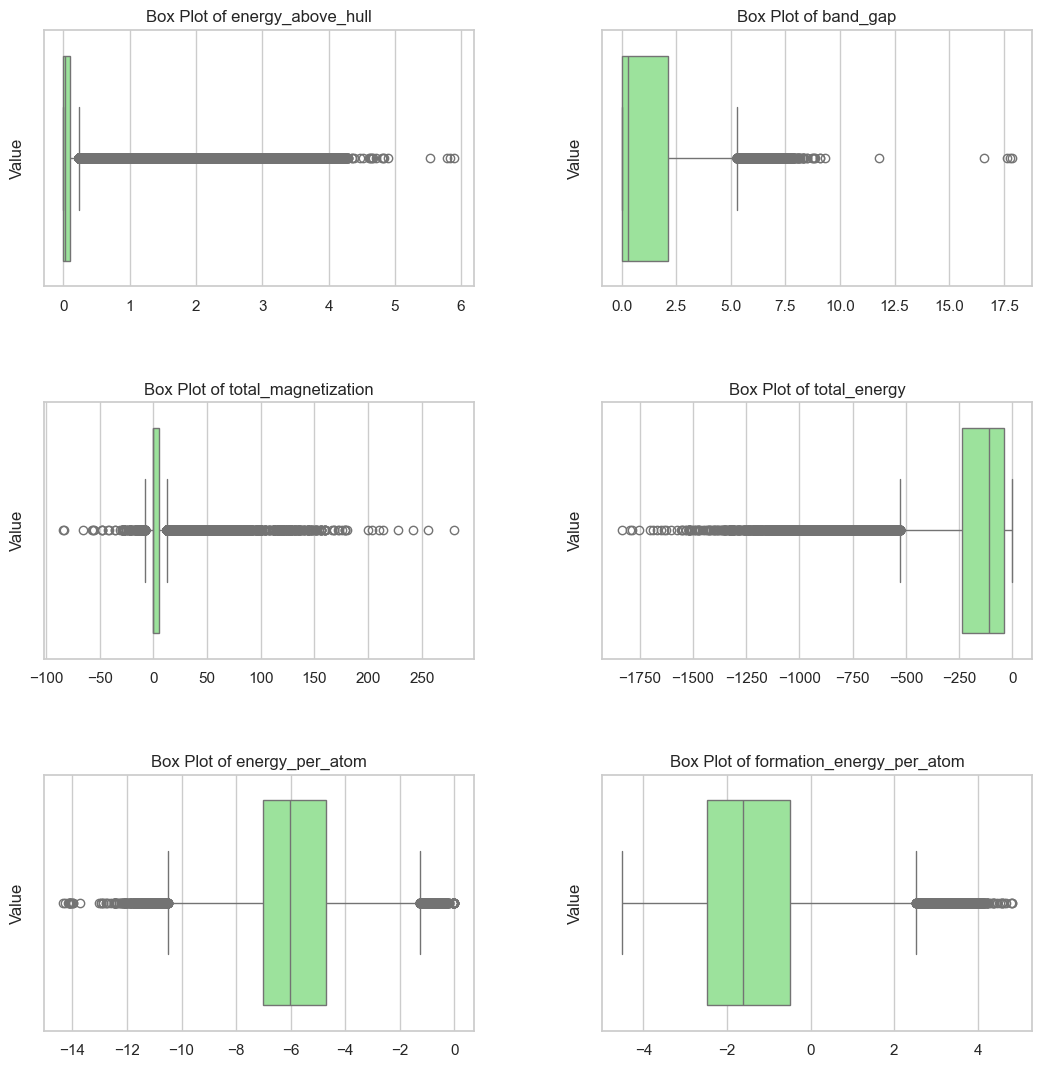

In [18]:
# Setting up the aesthetic style of the plots
sns.set(style="whitegrid")

# Data loading assumed to be done, using mp_nostruct as the DataFrame
features = ['energy_above_hull', 
            'band_gap', 
            'total_magnetization', 
            'total_energy', 
            'energy_per_atom', 
            'formation_energy_per_atom']

y_lims = [3000, 10000, 4000, 6000, 2700, 3200]
# Figure 1: Histograms with density overlays
fig1, axes1 = plt.subplots(3, 2, figsize=(12, 12))  # Adjust figsize as needed
fig1.tight_layout(pad=5.0)
axes1 = axes1.ravel()  # Flatten the array for easier indexing

for i, feature in enumerate(features):
    sns.histplot(mp_nostruct[feature], kde=True, ax=axes1[i], color='skyblue')
    axes1[i].set_title(f'Histogram of {feature}')
    axes1[i].set_xlabel('')
    axes1[i].set_ylabel('Density')
    # Set y and x limit to their 
    axes1[i].set_ylim(0, y_lims[i])

plt.show()

# Figure 2: Box plots
fig2, axes2 = plt.subplots(3, 2, figsize=(12, 12))  # Adjust figsize as needed
fig2.tight_layout(pad=5.0)
axes2 = axes2.ravel()  # Flatten the array for easier indexing

for i, feature in enumerate(features):
    sns.boxplot(x=mp_nostruct[feature], ax=axes2[i], color='lightgreen')
    axes2[i].set_title(f'Box Plot of {feature}')
    axes2[i].set_xlabel('')
    axes2[i].set_ylabel('Value')

plt.show()

# 3. Bivariate analysis (1 point)

analysis of bivariate dependencies, visualization

For the bivariate analysis visualizations (e.g., scatter plots) or pairwise Pearson or Spearman correlations, or attraction-repulsion indices are enough. There is no need for testing or confidence intervals here either.

For bivariate analysis visualizations (e.g. scatter plots) or pairwise Pearson or Spearman correlations, or attraction-repulsion indices are enough (no need for testing or confidence intervals here either).

# 4. Multivariate analysis (3 point)



One should have at least 3-variate data, and one should use one of the methods from the course (traditional or robust PCA, MCA, CCA, classification (Fisher's linear discriminant analysis or depth based) or clustering (k-centers or hierarchical)). The choice of method should be justified, and results should be interpreted and discussed. If one used a method that was not discussed during the course, one should add an appendix describing the method (mathematically and intuitively).


For multivariate part, one should have at least 3-variate data, and one should use PCA (traditional or robust), MCA, CCA, classification (FLDA or depth based) or clustering (k-centers or hierarchical). Choice of method should be justified, and results should be interpreted and discussed.  If one used a method that is not discussed during the course, one should add an appendix describing the method (mathematically and intuitively). 

## a. Selection of methods (1 point)



## b. Technical implementation (1 point)



## c. Result presentation and interpretation (1 point)



# 5. Critical evaluations (0.5 point) 

report about possible sources of biases etc.

## References

[1] Jain, A.; Ong, S.; Hautier, G.; Chen, W.; Richards, W.; Dacek, S., et al. (2013). Commentary: The Materials Project: A materials genome approach to accelerating materials innovation. APL Materials, 1(1), 011002. Report #: ARTN 011002. http://dx.doi.org/10.1063/1.4812323 Retrieved from https://escholarship.org/uc/item/3h26p692